In [513]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE

In [514]:
df = pd.read_csv("https://raw.githubusercontent.com/ggarci10/refactored-meme/main/Twitch_game_data%202016-2019.csv")
df.head()


,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


In [515]:
goty = pd.read_csv("https://raw.githubusercontent.com/ggarci10/refactored-meme/main/the_game_awards.csv")



In [516]:
goty2016 = goty[goty['year'] == 2016]
goty2017 = goty[goty['year'] == 2017]
goty2018 = goty[goty['year'] == 2018]
goty2016 = goty2016.reset_index(drop=True)
goty2017 = goty2016.reset_index(drop=True)
goty2018 = goty2016.reset_index(drop=True)
goty2016.head()

,year,category,nominee,company,winner,voted
0,2016,Game of the Year,Overwatch,Blizzard Entertainment,1,jury
1,2016,Game of the Year,Doom,id Software,0,jury
2,2016,Game of the Year,Inside,Playdead,0,jury
3,2016,Game of the Year,Titanfall 2,Respawn Entertainment,0,jury
4,2016,Game of the Year,Uncharted 4: A Thief's End,Naughty Dog,0,jury


In [517]:
mask2016 = df['Year'] == 2016

df_2016 = pd.DataFrame(df[mask2016])

# print(df_new)
grouped2016  = df_2016.groupby("Game")
# sum and average the other information by game
#Game	Month	Year	Hours_watched total	Hours_streamed	Peak_viewers	Peak_channels	Streamers	Avg_viewers	Avg_channels	Avg_viewer_ratio
result2016 = grouped2016.agg({"Game" : "first","Hours_watched": "sum", "Hours_streamed": "max", "Peak_viewers":"max", "Peak_channels": "max", "Streamers": "mean", "Avg_viewer_ratio":"max"})
result2016.head()

,Game,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewer_ratio
Game,,,,,,,
60 Seconds!,60 Seconds!,1151013,2065,56904,30,365.333333,450.17
7 Days to Die,7 Days to Die,6639960,190266,36862,950,6969.333333,22.23
ABZ<U+00DB>,ABZ<U+00DB>,338342,5738,28205,116,2587.000000,58.97
APB Reloaded,APB Reloaded,277614,10747,17386,37,1073.000000,25.83
ARAYA,ARAYA,142823,437,28289,12,184.000000,326.83


In [518]:
mask2017 = df['Year'] == 2017

df_2017 = pd.DataFrame(df[mask2017])

# print(df_new)

grouped2017  = df_2017.groupby("Game")
# sum and average the other information by game

result2017  = grouped2017 .agg({"Game" : "first","Hours_watched": "sum", "Hours_streamed": "max", "Peak_viewers":"max", "Peak_channels": "max", "Streamers": "mean", "Avg_viewer_ratio":"max"})
result2017.head()


,Game,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewer_ratio
Game,,,,,,,
.hack//G.U. Last Recode,.hack//G.U. Last Recode,145350,35258,1222,258,3174.000000,4.12
60 Seconds!,60 Seconds!,623520,679,31311,10,242.666667,388.04
7 Days to Die,7 Days to Die,8305182,94377,39478,266,7016.916667,20.49
<U+014C>kami,<U+014C>kami,181539,19273,29429,148,3305.000000,9.42
A Hat in Time,A Hat in Time,709295,20147,28625,182,2232.500000,32.64


In [519]:
mask2018 = df['Year'] == 2018

df_2018 = pd.DataFrame(df[mask2018])

# print(df_new)

grouped2018  = df_2018.groupby("Game")
# sum and average the other information by game

result2018  = grouped2018.agg({"Game" : "first","Hours_watched": "sum", "Hours_streamed": "max", "Peak_viewers":"max", "Peak_channels": "max", "Streamers": "mean", "Avg_viewer_ratio":"max"})
result2018

,Game,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewer_ratio
Game,,,,,,,
60 Parsecs!,60 Parsecs!,529688,1867,31960,27,606.000000,283.71
60 Seconds!,60 Seconds!,222209,871,18245,8,414.000000,255.12
7 Days to Die,7 Days to Die,6897693,80431,25079,293,5587.000000,15.99
A Hat in Time,A Hat in Time,286598,14520,8015,182,3065.000000,19.74
A Way Out,A Way Out,6505470,89705,233484,1587,17175.000000,60.46
...,...,...,...,...,...,...,...
Z1: Battle Royale,Z1: Battle Royale,13886280,119368,136561,675,11250.250000,25.09
"Zero Escape: Nine Hours, Nine Persons, Nine Doors","Zero Escape: Nine Hours, Nine Persons, Nine Doors",197213,661,7155,7,62.000000,298.36
iRacing,iRacing,1483730,21577,6547,217,1549.833333,17.16


In [520]:
check=goty2016['nominee']
game=result2016['Game']
len(check)
game

Game
60 Seconds!                                            60 Seconds!
7 Days to Die                                        7 Days to Die
ABZ<U+00DB>                                            ABZ<U+00DB>
APB Reloaded                                          APB Reloaded
ARAYA                                                        ARAYA
                                                ...               
Z1: Battle Royale                                Z1: Battle Royale
Zelda II: The Adventure of Link    Zelda II: The Adventure of Link
Zero Escape: Zero Time Dilemma      Zero Escape: Zero Time Dilemma
iRacing                                                    iRacing
osu!                                                          osu!
Name: Game, Length: 620, dtype: object

In [521]:
len(check)
check


0                             Overwatch
1                                  Doom
2                                Inside
3                           Titanfall 2
4            Uncharted 4: A Thief's End
                     ...               
114    Counter-Strike: Global Offensive
115                              Dota 2
116                   League of Legends
117                    Street Fighter V
118                        Hideo Kojima
Name: nominee, Length: 119, dtype: object

In [522]:
len(game)

620

In [523]:




# Create a new column. For example, a column of NaNs
result2016['ifnominated'] = pd.np.nan
# result2016['ifnominated'][0]='yes'
# result2016
number=0
for x in range(len(result2016)):
  number=0
  for y in range(len(goty2016)):
    if(result2016['Game'][x]==goty2016['nominee'][y]):
      #print(x,y)
      number=number+1
  if(number!=0):
    result2016['ifnominated'][x]='yes'
  else:
    result2016['ifnominated'][x]='no'







# Create a new column. For example, a column of NaNs
result2017['ifnominated'] = pd.np.nan
# result2016['ifnominated'][0]='yes'
# result2016
number=0
for x in range(len(result2017)):
  number=0
  for y in range(len(goty2017)):
    if(result2017['Game'][x]==goty2017['nominee'][y]):
      #print(x,y)
      number=number+1
  if(number!=0):
    result2017['ifnominated'][x]='yes'
  else:
    result2017['ifnominated'][x]='no'







# Create a new column. For example, a column of NaNs
result2018['ifnominated'] = pd.np.nan
# result2016['ifnominated'][0]='yes'
# result2016
number=0
for x in range(len(result2018)):
  number=0
  for y in range(len(goty2018)):
    if(result2018['Game'][x]==goty2018['nominee'][y]):
      #print(x,y)
      number=number+1
  if(number!=0):
    result2018['ifnominated'][x]='yes'
  else:
    result2018['ifnominated'][x]='no'














<ipython-input-523-2b064d52f934>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  result2016['ifnominated'] = pd.np.nan
<ipython-input-523-2b064d52f934>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result2016['ifnominated'][x]='no'
<ipython-input-523-2b064d52f934>:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  result2017['ifnominated'] = pd.np.nan
<ipython-input-523-2b064d52f934>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resul

In [524]:
result2016

,Game,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewer_ratio,ifnominated
Game,,,,,,,,
60 Seconds!,60 Seconds!,1151013,2065,56904,30,365.333333,450.17,no
7 Days to Die,7 Days to Die,6639960,190266,36862,950,6969.333333,22.23,no
ABZ<U+00DB>,ABZ<U+00DB>,338342,5738,28205,116,2587.000000,58.97,no
APB Reloaded,APB Reloaded,277614,10747,17386,37,1073.000000,25.83,no
ARAYA,ARAYA,142823,437,28289,12,184.000000,326.83,no
...,...,...,...,...,...,...,...,...
Z1: Battle Royale,Z1: Battle Royale,87872183,370148,84161,882,15932.500000,50.44,no
Zelda II: The Adventure of Link,Zelda II: The Adventure of Link,181560,747,94715,12,100.000000,243.05,no
Zero Escape: Zero Time Dilemma,Zero Escape: Zero Time Dilemma,321911,3755,17601,27,401.000000,85.73,no


In [525]:
result2017

,Game,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewer_ratio,ifnominated
Game,,,,,,,,
.hack//G.U. Last Recode,.hack//G.U. Last Recode,145350,35258,1222,258,3174.000000,4.12,no
60 Seconds!,60 Seconds!,623520,679,31311,10,242.666667,388.04,no
7 Days to Die,7 Days to Die,8305182,94377,39478,266,7016.916667,20.49,no
<U+014C>kami,<U+014C>kami,181539,19273,29429,148,3305.000000,9.42,no
A Hat in Time,A Hat in Time,709295,20147,28625,182,2232.500000,32.64,no
...,...,...,...,...,...,...,...,...
Yu-Gi-Oh! Duel Links,Yu-Gi-Oh! Duel Links,1879042,13456,22914,52,877.750000,44.26,no
Z1: Battle Royale,Z1: Battle Royale,89752462,482900,145097,1184,28988.166667,42.24,no
iRacing,iRacing,139492,11507,1638,131,1025.000000,12.12,no


In [526]:

result2018

,Game,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewer_ratio,ifnominated
Game,,,,,,,,
60 Parsecs!,60 Parsecs!,529688,1867,31960,27,606.000000,283.71,no
60 Seconds!,60 Seconds!,222209,871,18245,8,414.000000,255.12,no
7 Days to Die,7 Days to Die,6897693,80431,25079,293,5587.000000,15.99,no
A Hat in Time,A Hat in Time,286598,14520,8015,182,3065.000000,19.74,no
A Way Out,A Way Out,6505470,89705,233484,1587,17175.000000,60.46,no
...,...,...,...,...,...,...,...,...
Z1: Battle Royale,Z1: Battle Royale,13886280,119368,136561,675,11250.250000,25.09,no
"Zero Escape: Nine Hours, Nine Persons, Nine Doors","Zero Escape: Nine Hours, Nine Persons, Nine Doors",197213,661,7155,7,62.000000,298.36,no
iRacing,iRacing,1483730,21577,6547,217,1549.833333,17.16,no


Yes count: 30
No count: 590


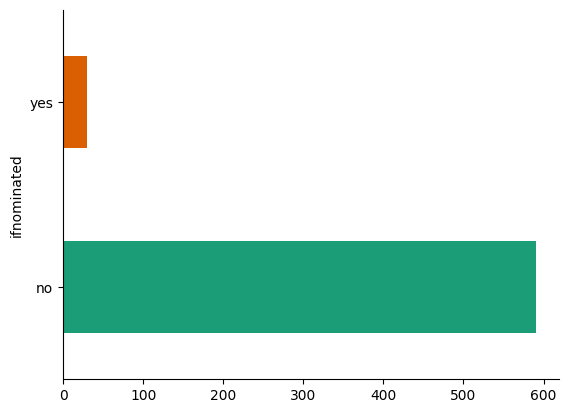

In [527]:

result2016.groupby('ifnominated').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
yes_count = result2016['ifnominated'].value_counts()['yes']
no_count = result2016['ifnominated'].value_counts()['no']
print('Yes count:', yes_count)
print('No count:', no_count)


Yes count: 23
No count: 574


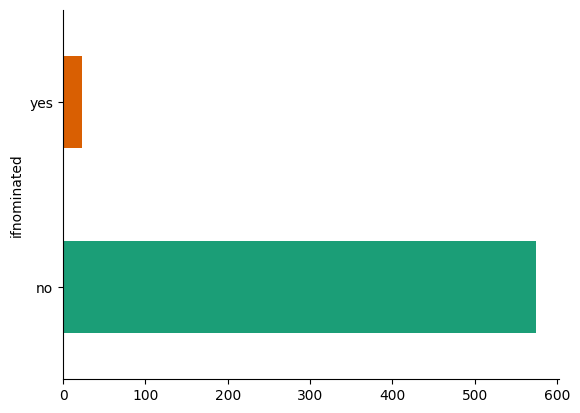

In [528]:

result2017.groupby('ifnominated').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
yes_count = result2017['ifnominated'].value_counts()['yes']
no_count = result2017['ifnominated'].value_counts()['no']
print('Yes count:', yes_count)
print('No count:', no_count)

Yes count: 15
No count: 571


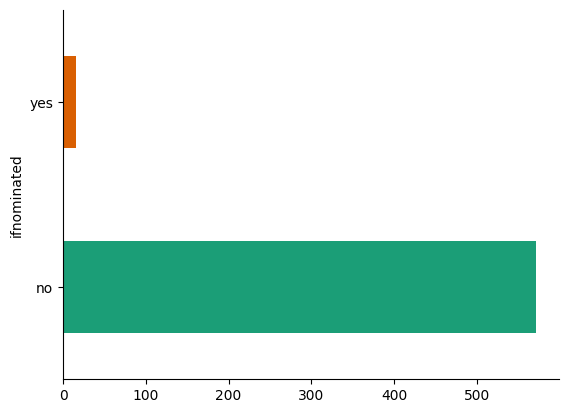

In [529]:

result2018.groupby('ifnominated').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
yes_count = result2018['ifnominated'].value_counts()['yes']
no_count = result2018['ifnominated'].value_counts()['no']
print('Yes count:', yes_count)
print('No count:', no_count)

In [530]:
feature_cols = ['Hours_watched','Hours_streamed','Peak_viewers','Peak_channels','Streamers','Avg_viewer_ratio']


In [531]:
X = result2016[feature_cols]
# X_createdTest= result2017[feature_cols]
# Y_createdTest= result2017['ifnominated']


In [532]:
y=result2016['ifnominated']


In [533]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=10)
# Count before balancing
counter_before = Counter(y_train)
print('Before balancing aaa:', counter_before)

# Balance the dataset


smote = SMOTE(random_state=10)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Count after balancing
counter_after = Counter(y_train)
print('After balancing:', counter_after)

Before balancing aaa: Counter({'no': 235, 'yes': 13})
After balancing: Counter({'yes': 235, 'no': 235})


In [534]:
randomforest2016 = RandomForestClassifier(n_estimators=5, bootstrap=True, random_state=6)

# Fit the model to your training data
randomforest2016.fit(X_train, y_train)

# Use the trained model to predict the labels of your test data
y_predict_rf2016 = randomforest2016.predict(X_test)

# Calculate the accuracy of your model's predictions
score = accuracy_score(y_test, y_predict_rf2016)
y_predict_prob_rf2016 = randomforest2016.predict_proba(X_test)
# Print the accuracy score
print(score)
fprrf2016, tprrf2016, thresholdsrf2016 = metrics.roc_curve(y_test, y_predict_prob_rf2016[:,1], pos_label='yes')

print(fprrf2016)
print(tprrf2016)
AUCrf2016 = metrics.auc(fprrf2016, tprrf2016)
print(AUCrf2016)

0.9112903225806451
[0.         0.02253521 0.03098592 0.05915493 0.12112676 0.25070423
 1.        ]
[0.         0.11764706 0.23529412 0.29411765 0.82352941 1.
 1.        ]
0.9123446561723281


BEFORE THIS OPART DO RF

In [535]:
#this is used with 3 classifiers
my_logreg = LogisticRegression()
my_logreg.fit(X_train,y_train)
y_predict_logreg2016=my_logreg.predict(X_test)
logregaccuracy=accuracy_score(y_test,y_predict_logreg2016)
print(round(logregaccuracy, 2))
y_predict_prob_logreg2016 = my_logreg.predict_proba(X_test)






0.78


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [536]:

print(y_predict_logreg2016)

['no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'yes'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no'
 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'no'
 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'y

In [537]:

fprlogreg2016, tprlogreg2016, thresholdslogreg2016 = metrics.roc_curve(y_test, y_predict_prob_logreg2016[:,1], pos_label='yes')

print(fprlogreg2016)
print(tprlogreg2016)
AUClogreg2016 = metrics.auc(fprlogreg2016, tprlogreg2016)
print(AUClogreg2016)

[0.         0.         0.0084507  0.0084507  0.01690141 0.01690141
 0.02816901 0.02816901 0.05070423 0.05070423 0.05352113 0.05352113
 0.05633803 0.05633803 0.05915493 0.05915493 0.11830986 0.11830986
 0.16619718 0.16619718 0.1915493  0.1915493  0.30422535 0.30422535
 0.41690141 0.41690141 0.78873239 0.78873239 0.87042254 0.87042254
 1.        ]
[0.         0.05882353 0.05882353 0.17647059 0.17647059 0.29411765
 0.29411765 0.35294118 0.35294118 0.41176471 0.41176471 0.47058824
 0.47058824 0.52941176 0.52941176 0.58823529 0.58823529 0.64705882
 0.64705882 0.70588235 0.70588235 0.76470588 0.76470588 0.82352941
 0.82352941 0.88235294 0.88235294 0.94117647 0.94117647 1.
 1.        ]
0.8144159072079535


In [538]:

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
# plt.plot(fprlogreg2016, tprlogreg2016, color='red', lw=2,
#          label='ROC Curve (area = %0.2f)' % AUClogreg2016)

# # Random Guess line:
# plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# # Defining The Range of X-Axis and Y-Axis:
# plt.xlim([-0.005, 1.005])
# plt.ylim([0.0, 1.01])

# # Labels, Title, Legend:
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")

# plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [539]:
#create decisiontree
my_decisiontree = DecisionTreeClassifier(random_state=5)
my_decisiontree.fit(X_train, y_train)
y_predict_mdt2016 = my_decisiontree.predict(X_test)

mdtaccuracy= accuracy_score(y_test,y_predict_mdt2016)
print(round(mdtaccuracy,2))
# Predicting the Binary Label:
y_predict_mdt2016 = my_decisiontree.predict(X_test)

# Estimating the probability (likelihood) of Each Label:
y_predict_prob_mdt2016 = my_decisiontree.predict_proba(X_test)
print(y_predict_mdt2016)

0.9
['no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes'
 'no' 'no' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'yes' 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no

In [540]:
fprmdt2016, tprmdt2016, thresholdsmdt2016 = metrics.roc_curve(y_test, y_predict_prob_mdt2016[:,1], pos_label='yes')

print(fprmdt2016)
print(tprmdt2016)
AUCmdt2016 = metrics.auc(fprmdt2016, tprmdt2016)
print(AUCmdt2016)

%matplotlib inline

plt.figure()

# Roc Curve:
# plt.plot(fprmdt2016, tprmdt2016, color='red', lw=2,
#          label='ROC Curve (area = %0.2f)' % AUCmdt2016)

# # Random Guess line:
# plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# # Defining The Range of X-Axis and Y-Axis:
# plt.xlim([-0.005, 1.005])
# plt.ylim([0.0, 1.01])

# # Labels, Title, Legend:
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")

# plt.show()

[0.         0.07605634 1.        ]
[0.         0.29411765 1.        ]
0.6090306545153272


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [541]:
k = 20
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
y_predict_knn2016 = knn.predict(X_test)
knnaccuracy = accuracy_score(y_test, y_predict_knn2016)

print(round(knnaccuracy,2))

0.67


In [542]:


# Estimating the probability (likelihood) of Each Label:
y_predict_prob_knn2016 = knn.predict_proba(X_test)
print(y_predict_prob_knn2016)

[[0.7  0.3 ]
 [1.   0.  ]
 [0.75 0.25]
 [0.75 0.25]
 [0.65 0.35]
 [0.25 0.75]
 [0.1  0.9 ]
 [0.25 0.75]
 [0.75 0.25]
 [0.3  0.7 ]
 [1.   0.  ]
 [0.4  0.6 ]
 [0.45 0.55]
 [0.35 0.65]
 [1.   0.  ]
 [0.7  0.3 ]
 [0.3  0.7 ]
 [0.6  0.4 ]
 [0.05 0.95]
 [0.55 0.45]
 [0.45 0.55]
 [1.   0.  ]
 [0.55 0.45]
 [0.7  0.3 ]
 [0.35 0.65]
 [0.75 0.25]
 [0.5  0.5 ]
 [0.4  0.6 ]
 [0.25 0.75]
 [0.65 0.35]
 [1.   0.  ]
 [0.75 0.25]
 [0.3  0.7 ]
 [1.   0.  ]
 [0.25 0.75]
 [0.65 0.35]
 [1.   0.  ]
 [0.85 0.15]
 [0.65 0.35]
 [1.   0.  ]
 [0.65 0.35]
 [0.45 0.55]
 [0.3  0.7 ]
 [1.   0.  ]
 [0.65 0.35]
 [0.65 0.35]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.6  0.4 ]
 [0.95 0.05]
 [0.25 0.75]
 [0.3  0.7 ]
 [0.95 0.05]
 [0.25 0.75]
 [0.65 0.35]
 [0.5  0.5 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.75 0.25]
 [0.5  0.5 ]
 [0.4  0.6 ]
 [1.   0.  ]
 [0.15 0.85]
 [1.   0.  ]
 [1.   0.  ]
 [0.35 0.65]
 [0.6  0.4 ]
 [1.   0.  ]
 [0.2  0.8 ]
 [0.6  0.4 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.75 0.25]
 [1.   0.  ]
 [0.4  0.6 ]

[0.         0.0056338  0.04507042 0.07887324 0.10422535 0.16619718
 0.2        0.26760563 0.30140845 0.32957746 0.35492958 0.4
 0.43943662 0.54929577 0.63661972 0.71830986 0.73521127 0.74084507
 0.75774648 0.78591549 1.        ]
[0.         0.         0.         0.17647059 0.23529412 0.29411765
 0.41176471 0.52941176 0.52941176 0.58823529 0.64705882 0.64705882
 0.76470588 0.82352941 0.88235294 0.94117647 1.         1.
 1.         1.         1.        ]
0.692046396023198


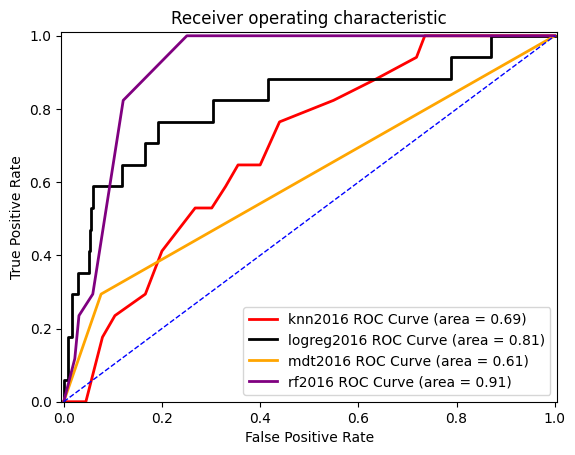

In [543]:
fpr2016knn, tpr2016knn, thresholds2016knn = metrics.roc_curve(y_test, y_predict_prob_knn2016[:,1], pos_label='yes')

print(fpr2016knn)
print(tpr2016knn)
AUC2016knn = metrics.auc(fpr2016knn, tpr2016knn)
print(AUC2016knn)

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr2016knn, tpr2016knn, color='red', lw=2,label='knn2016 ROC Curve (area = %0.2f)' % AUC2016knn)
plt.plot(fprlogreg2016, tprlogreg2016, color='black', lw=2,label='logreg2016 ROC Curve (area = %0.2f)' % AUClogreg2016)


plt.plot(fprmdt2016, tprmdt2016, color='orange', lw=2, label='mdt2016 ROC Curve (area = %0.2f)' % AUCmdt2016)
plt.plot(fprrf2016, tprrf2016 , color='purple', lw=2, label='rf2016 ROC Curve (area = %0.2f)' % AUCrf2016)
# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')



# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [544]:
# now onto 2017 data

In [545]:
feature_cols = ['Hours_watched','Hours_streamed','Peak_viewers','Peak_channels','Streamers','Avg_viewer_ratio']
X = result2017[feature_cols]
y=result2017['ifnominated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=10)

# Count before balancing
counter_before = Counter(y_train)
print('Before balancing aaa:', counter_before)

# Balance the dataset

smote = SMOTE(k_neighbors=4, random_state=10)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Count after balancing
counter_after = Counter(y_train)
print('After balancing:', counter_after)


Before balancing aaa: Counter({'no': 233, 'yes': 5})
After balancing: Counter({'no': 233, 'yes': 233})


In [546]:
randomforest2017 = RandomForestClassifier(n_estimators=5, bootstrap=True, random_state=6)

# Fit the model to your training data
randomforest2017.fit(X_train, y_train)

# Use the trained model to predict the labels of your test data
y_predict_rf2017 = randomforest2017.predict(X_test)

# Calculate the accuracy of your model's predictions
score = accuracy_score(y_test, y_predict_rf2017)
y_predict_prob_rf2017 = randomforest2017.predict_proba(X_test)
# Print the accuracy score
print(score)
fprrf2017, tprrf2017, thresholdsrf2017 = metrics.roc_curve(y_test, y_predict_prob_rf2017[:,1], pos_label='yes')

print(fprrf2017)
print(tprrf2017)
AUCrf2017 = metrics.auc(fprrf2017, tprrf2017)
print(AUCrf2017)

0.8690807799442897
[0.         0.00879765 0.04985337 0.09970674 0.16715543 0.23167155
 1.        ]
[0.         0.05555556 0.16666667 0.27777778 0.33333333 0.55555556
 1.        ]
0.6627565982404692


before here do RF  for 2017


In [547]:
#this is used with 3 classifiers
my_logreg = LogisticRegression()
my_logreg.fit(X_train,y_train)
y_predict_logreg2017=my_logreg.predict(X_test)
logregaccuracy=accuracy_score(y_test,y_predict_logreg2017)
y_predict_prob_logreg2017 = my_logreg.predict_proba(X_test)

print(round(logregaccuracy, 2))
print(y_predict_logreg2017)

0.79
['no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes'
 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes'
 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes'
 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'yes'
 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no'
 'no' 'no' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'yes' 'no' 'yes'
 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' '

In [548]:

fprlogreg2017, tprlogreg2017, thresholdslogreg2017 = metrics.roc_curve(y_test, y_predict_prob_logreg2017[:,1], pos_label='yes')

print(fprlogreg2017)
print(tprlogreg2017)
AUClogreg2017 = metrics.auc(fprlogreg2017, tprlogreg2017)
print(AUClogreg2017)

[0.         0.00293255 0.07038123 0.07038123 0.07624633 0.07624633
 0.09384164 0.09384164 0.1143695  0.1143695  0.28445748 0.28445748
 0.32844575 0.32844575 0.36656891 0.36656891 0.4516129  0.4516129
 0.48973607 0.48973607 0.5483871  0.5483871  0.59237537 0.59237537
 0.68621701 0.68621701 0.69501466 0.69501466 0.78005865 0.78005865
 0.79765396 0.79765396 0.92375367 0.92375367 0.96187683 0.96187683
 0.97653959 0.97653959 1.        ]
[0.         0.         0.         0.05555556 0.05555556 0.11111111
 0.11111111 0.16666667 0.16666667 0.22222222 0.22222222 0.27777778
 0.27777778 0.33333333 0.33333333 0.38888889 0.38888889 0.44444444
 0.44444444 0.5        0.5        0.55555556 0.55555556 0.61111111
 0.61111111 0.66666667 0.66666667 0.72222222 0.72222222 0.77777778
 0.77777778 0.83333333 0.83333333 0.88888889 0.88888889 0.94444444
 0.94444444 1.         1.        ]
0.4868035190615836


In [549]:
#create decisiontree
my_decisiontree = DecisionTreeClassifier(random_state=5)
my_decisiontree.fit(X_train, y_train)
y_predict_mdt2017=my_decisiontree.predict(X_test)
mdtaccuracy= accuracy_score(y_test,y_predict_mdt2017)
print(round(mdtaccuracy,2))


# Estimating the probability (likelihood) of Each Label:
y_predict_prob_mdt2017 = my_decisiontree.predict_proba(X_test)
print(y_predict_mdt2017)

0.89
['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no'
 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' '

In [550]:
fprmdt2017, tprmdt2017, thresholdsmdt2017 = metrics.roc_curve(y_test, y_predict_prob_mdt2017[:,1], pos_label='yes')

print(fprmdt2017)
print(tprmdt2017)
AUCmdt2017 = metrics.auc(fprmdt2017, tprmdt2017)
print(AUCmdt2017)


[0.         0.06451613 1.        ]
[0.         0.11111111 1.        ]
0.5232974910394266


In [551]:
k = 20
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
y_predict_knn2017 = knn.predict(X_test)
knnaccuracy = accuracy_score(y_test, y_predict_knn2017)
y_predict_prob_knn2017 = knn.predict_proba(X_test)

print(round(knnaccuracy,2))

0.75


In [552]:


# Estimating the probability (likelihood) of Each Label:

print(y_predict_prob_knn2017)

[[1.   0.  ]
 [1.   0.  ]
 [0.3  0.7 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.1  0.9 ]
 [0.2  0.8 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.15 0.85]
 [0.25 0.75]
 [1.   0.  ]
 [0.15 0.85]
 [1.   0.  ]
 [1.   0.  ]
 [0.25 0.75]
 [1.   0.  ]
 [0.7  0.3 ]
 [0.25 0.75]
 [1.   0.  ]
 [0.55 0.45]
 [1.   0.  ]
 [0.5  0.5 ]
 [0.15 0.85]
 [0.55 0.45]
 [0.2  0.8 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.3  0.7 ]
 [1.   0.  ]
 [0.15 0.85]
 [1.   0.  ]
 [0.55 0.45]
 [1.   0.  ]
 [0.   1.  ]
 [0.85 0.15]
 [1.   0.  ]
 [0.2  0.8 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.85 0.15]
 [1.   0.  ]
 [1.   0.  ]
 [0.6  0.4 ]
 [0.15 0.85]
 [1.   0.  ]
 [1.   0.  ]
 [0.55 0.45]
 [1.   0.  ]
 [0.8  0.2 ]
 [0.15 0.85]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.2  0.8 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.35 0.65]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]

[0.         0.01173021 0.01759531 0.04985337 0.07624633 0.13489736
 0.17302053 0.2111437  0.22580645 0.24633431 0.25219941 0.26686217
 0.30498534 0.3255132  0.35777126 0.38709677 0.39002933 0.40762463
 0.4340176  0.43695015 1.        ]
[0.         0.11111111 0.16666667 0.22222222 0.27777778 0.55555556
 0.61111111 0.61111111 0.61111111 0.66666667 0.72222222 0.72222222
 0.72222222 0.72222222 0.72222222 0.77777778 0.77777778 0.77777778
 0.77777778 0.77777778 1.        ]
0.7479635060280221


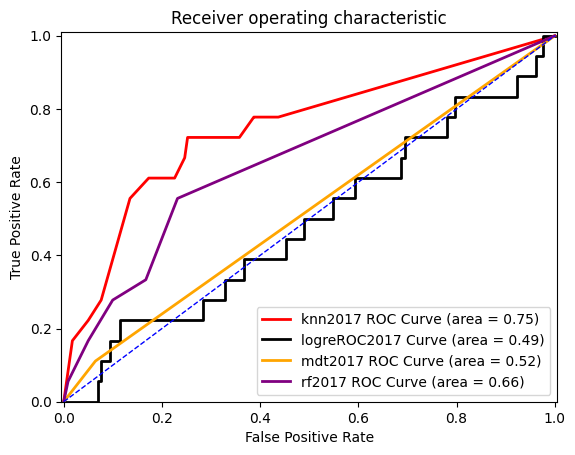

In [553]:
fpr2017knn, tpr2017knn, thresholds2017knn = metrics.roc_curve(y_test, y_predict_prob_knn2017[:,1], pos_label='yes')

print(fpr2017knn)
print(tpr2017knn)
AUC2017knn = metrics.auc(fpr2017knn, tpr2017knn)
print(AUC2017knn)

%matplotlib inline

plt.figure()

# Roc Curve
plt.plot(fpr2017knn, tpr2017knn, color='red', lw=2,label='knn2017 ROC Curve (area = %0.2f)' % AUC2017knn)
plt.plot(fprlogreg2017, tprlogreg2017, color='black', lw=2,label='logreROC2017 Curve (area = %0.2f)' % AUClogreg2017)
plt.plot(fprmdt2017, tprmdt2017, color='orange', lw=2, label='mdt2017 ROC Curve (area = %0.2f)' % AUCmdt2017)
plt.plot(fprrf2017, tprrf2017 , color='purple', lw=2, label='rf2017 ROC Curve (area = %0.2f)' % AUCrf2017)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')



# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [554]:
feature_cols = ['Hours_watched','Hours_streamed','Peak_viewers','Peak_channels','Streamers','Avg_viewer_ratio']
X = result2018[feature_cols]
y=result2018['ifnominated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=10)

# Count before balancing
counter_before = Counter(y_train)
print('Before balancing aaa:', counter_before)

# Balance the dataset
smote = SMOTE(k_neighbors=3, random_state=10)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Count after balancing
counter_after = Counter(y_train)
print('After balancing:', counter_after)

#this is used with
my_logreg = LogisticRegression()
my_logreg.fit(X_train,y_train)
y_predict_logreg2018=my_logreg.predict(X_test)
logregaccuracy=accuracy_score(y_test,y_predict_logreg2018)
print(round(logregaccuracy, 2))
# Predicting the Binary Label:
y_predict_prob_logreg2018 = my_logreg.predict_proba(X_test)



fprlogreg2018, tprlogreg2018, thresholdslogreg2018 = metrics.roc_curve(y_test, y_predict_prob_logreg2018[:,1], pos_label='yes')

print(fprlogreg2018)
print(tprlogreg2018)
AUClogreg2018 = metrics.auc(fprlogreg2018, tprlogreg2018)
print(AUClogreg2018)


Before balancing aaa: Counter({'no': 230, 'yes': 4})
After balancing: Counter({'no': 230, 'yes': 230})
0.78
[0.         0.00293255 0.0058651  0.0058651  0.01759531 0.01759531
 0.15542522 0.15542522 0.38709677 0.38709677 0.47507331 0.47507331
 0.82111437 0.82111437 0.85923754 0.85923754 0.91202346 0.91202346
 0.93548387 0.93548387 0.96187683 0.96187683 0.99120235 0.99120235
 1.        ]
[0.         0.         0.         0.09090909 0.09090909 0.18181818
 0.18181818 0.27272727 0.27272727 0.36363636 0.36363636 0.45454545
 0.45454545 0.54545455 0.54545455 0.63636364 0.63636364 0.72727273
 0.72727273 0.81818182 0.81818182 0.90909091 0.90909091 1.
 1.        ]
0.4070914422820581


In [555]:
randomforest2018 = RandomForestClassifier(n_estimators=5, bootstrap=True, random_state=6)

# Fit the model to your training data
randomforest2018.fit(X_train, y_train)

# Use the trained model to predict the labels of your test data
y_predict_rf2018 = randomforest2018 .predict(X_test)

# Calculate the accuracy of your model's predictions
score = accuracy_score(y_test, y_predict_rf2018)
y_predict_prob_rf2018 = randomforest2018 .predict_proba(X_test)
# Print the accuracy score
print(score)
fprrf2018, tprrf2018, thresholdsrf2018 = metrics.roc_curve(y_test, y_predict_prob_rf2018[:,1], pos_label='yes')

print(fprrf2018)
print(tprrf2018)
AUCrf2018 = metrics.auc(fprrf2018, tprrf2018)
print(AUCrf2018)

0.9744318181818182
[0.         0.         0.05278592 1.        ]
[0.         0.18181818 0.36363636 1.        ]
0.6602239402825913


do random forest before here


In [556]:
#create decisiontree
my_decisiontree = DecisionTreeClassifier(random_state=5)
my_decisiontree.fit(X_train, y_train)
y_predict_mdt2018=my_decisiontree.predict(X_test)
mdtaccuracy= accuracy_score(y_test,y_predict_mdt2018)
print(round(mdtaccuracy,2))
# Predicting the Binary Label:
y_predict_mdt2018 = my_decisiontree.predict(X_test)

# Estimating the probability (likelihood) of Each Label:
y_predict_prob_mdt2018 = my_decisiontree.predict_proba(X_test)
print(y_predict_mdt2018)
fprmdt2018, tprmdt2018, thresholdsmdt2018 = metrics.roc_curve(y_test, y_predict_prob_mdt2018[:,1], pos_label='yes')

print(fprmdt2018)
print(tprmdt2018)
AUCmdt2018 = metrics.auc(fprmdt2018, tprmdt2018)
print(AUCmdt2018)


0.97
['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'


In [557]:

k = 20
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
y_predict_knn2018 = knn.predict(X_test)
knnaccuracy = accuracy_score(y_test, y_predict_knn2018)

print(round(knnaccuracy,2))

y_predict_knn = knn.predict(X_test)

# Estimating the probability (likelihood) of Each Label:
y_predict_prob_knn2018 = knn.predict_proba(X_test)
print(y_predict_prob_knn2017)

fpr2018knn, tpr2018knn, thresholds2018knn = metrics.roc_curve(y_test, y_predict_prob_knn2018[:,1], pos_label='yes')

print(fpr2018knn)
print(tpr2018knn)
AUC2018knn = metrics.auc(fpr2018knn, tpr2018knn)
print(AUC2018knn)



0.92
[[1.   0.  ]
 [1.   0.  ]
 [0.3  0.7 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.1  0.9 ]
 [0.2  0.8 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.15 0.85]
 [0.25 0.75]
 [1.   0.  ]
 [0.15 0.85]
 [1.   0.  ]
 [1.   0.  ]
 [0.25 0.75]
 [1.   0.  ]
 [0.7  0.3 ]
 [0.25 0.75]
 [1.   0.  ]
 [0.55 0.45]
 [1.   0.  ]
 [0.5  0.5 ]
 [0.15 0.85]
 [0.55 0.45]
 [0.2  0.8 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.3  0.7 ]
 [1.   0.  ]
 [0.15 0.85]
 [1.   0.  ]
 [0.55 0.45]
 [1.   0.  ]
 [0.   1.  ]
 [0.85 0.15]
 [1.   0.  ]
 [0.2  0.8 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.85 0.15]
 [1.   0.  ]
 [1.   0.  ]
 [0.6  0.4 ]
 [0.15 0.85]
 [1.   0.  ]
 [1.   0.  ]
 [0.55 0.45]
 [1.   0.  ]
 [0.8  0.2 ]
 [0.15 0.85]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.2  0.8 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.35 0.65]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   

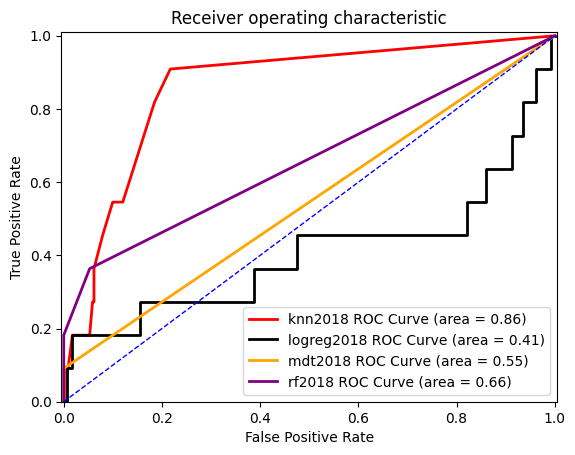

In [558]:
%matplotlib inline

plt.figure()

# Roc Curve
plt.plot(fpr2018knn, tpr2018knn, color='red', lw=2,label='knn2018 ROC Curve (area = %0.2f)' % AUC2018knn)
plt.plot(fprlogreg2018, tprlogreg2018 , color='black', lw=2,label='logreg2018 ROC Curve (area = %0.2f)' % AUClogreg2018)
plt.plot(fprmdt2018, tprmdt2018 , color='orange', lw=2, label='mdt2018 ROC Curve (area = %0.2f)' % AUCmdt2018)
plt.plot(fprrf2018, tprrf2018 , color='purple', lw=2, label='rf2018 ROC Curve (area = %0.2f)' % AUCrf2018)
# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')



# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

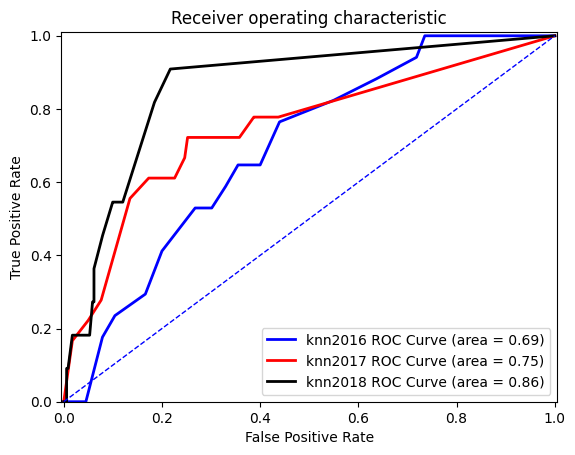

In [559]:


%matplotlib inline

plt.figure()

# Roc Curve
plt.plot(fpr2016knn, tpr2016knn, color='blue', lw=2,label='knn2016 ROC Curve (area = %0.2f)' % AUC2016knn)
plt.plot(fpr2017knn, tpr2017knn, color='red', lw=2,label='knn2017 ROC Curve (area = %0.2f)' % AUC2017knn)
plt.plot(fpr2018knn, tpr2018knn, color='black', lw=2,label='knn2018 ROC Curve (area = %0.2f)' % AUC2018knn)
# plt.plot(fprlogreg2018, tprlogreg2018 , color='black', lw=2,label='logreROC Curve (area = %0.2f)' % AUClogreg2018)
# plt.plot(fprmdt2018, tprmdt2018 , color='orange', lw=2, label='mdt ROC Curve (area = %0.2f)' % AUCmdt2018)
# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')



# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

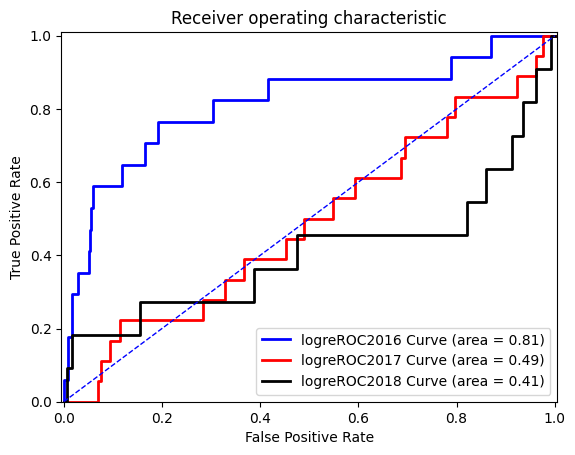

In [560]:
%matplotlib inline

plt.figure()

# Roc Curve
plt.plot(fprlogreg2016, tprlogreg2016 , color='blue', lw=2,label='logreROC2016 Curve (area = %0.2f)' % AUClogreg2016)
plt.plot(fprlogreg2017, tprlogreg2017 , color='red', lw=2,label='logreROC2017 Curve (area = %0.2f)' % AUClogreg2017)
plt.plot(fprlogreg2018, tprlogreg2018 , color='black', lw=2,label='logreROC2018 Curve (area = %0.2f)' % AUClogreg2018)

# plt.plot(fprmdt2018, tprmdt2018 , color='orange', lw=2, label='mdt ROC Curve (area = %0.2f)' % AUCmdt2018)
# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')



# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

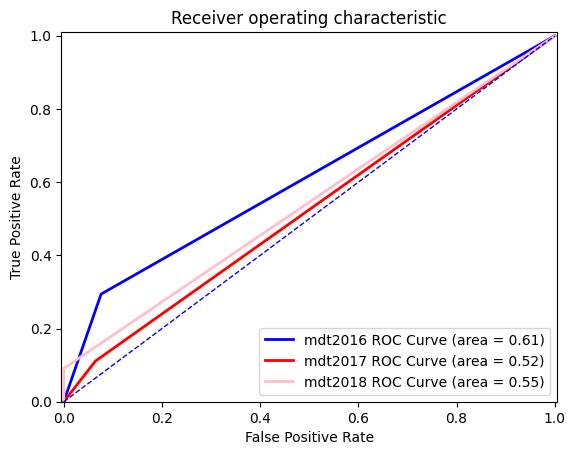

In [561]:
%matplotlib inline

plt.figure()

# Roc Curve
plt.plot(fprmdt2016, tprmdt2016 , color='blue', lw=2, label='mdt2016 ROC Curve (area = %0.2f)' % AUCmdt2016)
plt.plot(fprmdt2017, tprmdt2017 , color='red', lw=2, label='mdt2017 ROC Curve (area = %0.2f)' % AUCmdt2017)
plt.plot(fprmdt2018, tprmdt2018 , color='pink', lw=2, label='mdt2018 ROC Curve (area = %0.2f)' % AUCmdt2018)
# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')



# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

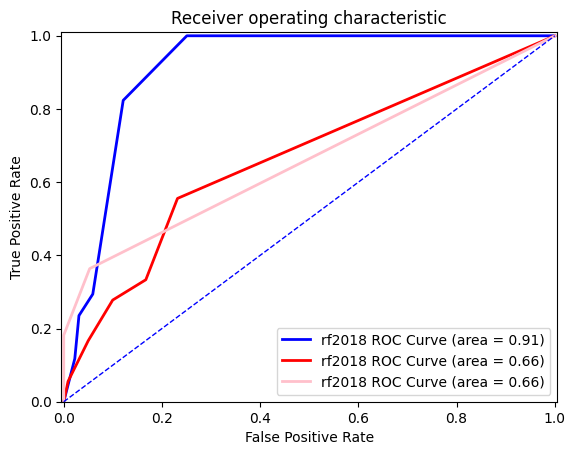

In [562]:
%matplotlib inline

plt.figure()

# Roc Curve
plt.plot(fprrf2016, tprrf2016 , color='blue', lw=2, label='rf2018 ROC Curve (area = %0.2f)' % AUCrf2016)
plt.plot(fprrf2017, tprrf2017 , color='red', lw=2, label='rf2018 ROC Curve (area = %0.2f)' % AUCrf2017)
plt.plot(fprrf2018, tprrf2018 , color='pink', lw=2, label='rf2018 ROC Curve (area = %0.2f)' % AUCrf2018)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')



# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [563]:
frames = [result2016, result2017, result2018]
result3years = pd.concat(frames)


In [564]:
feature_cols = ['Hours_watched','Peak_viewers','Avg_viewer_ratio']
X = result3years[feature_cols]
y=result3years['ifnominated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=10)

# Count before balancing
counter_before = Counter(y_train)
print('Before balancing aaa:', counter_before)

# Balance the dataset
smote = SMOTE(k_neighbors=4, random_state=10)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Count after balancing
counter_after = Counter(y_train)
print('After balancing:', counter_after)


Before balancing aaa: Counter({'no': 692, 'yes': 29})
After balancing: Counter({'no': 692, 'yes': 692})


In [565]:
#this is used with 3 classifiers
my_logreg = LogisticRegression()
my_logreg.fit(X_train,y_train)
y_predict_logreg3years=my_logreg.predict(X_test)
logregaccuracy=accuracy_score(y_test,y_predict_logreg3years)
print(round(logregaccuracy, 2))
# Predicting the Binary Label:
y_predict_prob_logreg3years = my_logreg.predict_proba(X_test)


0.84


In [566]:
fprlogreg3years, tprlogreg3years, thresholdslogreg2018 = metrics.roc_curve(y_test, y_predict_prob_logreg3years[:,1], pos_label='yes')

print(fprlogreg3years)
print(tprlogreg3years)
AUClogreg3years = metrics.auc(fprlogreg3years, tprlogreg3years)
print(AUClogreg3years)


[0.         0.         0.         0.00287632 0.00287632 0.00383509
 0.00383509 0.01438159 0.01438159 0.03068073 0.03068073 0.03451582
 0.03451582 0.06136146 0.06136146 0.08245446 0.08245446 0.09395973
 0.09395973 0.1303931  0.1303931  0.28283797 0.28283797 0.35282838
 0.35282838 0.35858102 0.35858102 0.41706616 0.41706616 0.42473634
 0.42473634 0.44103547 0.44103547 0.54074784 0.54074784 0.55321189
 0.55321189 0.59827421 0.59827421 0.62607862 0.62607862 0.69415149
 0.69415149 0.69511026 0.69511026 0.69798658 0.69798658 0.75551294
 0.75551294 0.75743049 0.75743049 0.78715244 0.78715244 0.81591563
 0.81591563 0.81879195 0.81879195 0.82358581 0.82358581 0.82933845
 0.82933845 0.86673058 0.86673058 0.89932886 0.89932886 0.93000959
 0.93000959 0.95302013 0.95302013 0.96740173 0.96740173 0.98753595
 0.98753595 1.        ]
[0.         0.02564103 0.05128205 0.05128205 0.1025641  0.1025641
 0.15384615 0.15384615 0.17948718 0.17948718 0.20512821 0.20512821
 0.23076923 0.23076923 0.25641026 0.256

In [567]:
#create decisiontree
my_decisiontree = DecisionTreeClassifier(random_state=5)
my_decisiontree.fit(X_train, y_train)
y_predict_mdt3years=my_decisiontree.predict(X_test)
mdtaccuracy= accuracy_score(y_test,y_predict_mdt3years)
print(round(mdtaccuracy,2))


# Estimating the probability (likelihood) of Each Label:
y_predict_prob_mdt3years = my_decisiontree.predict_proba(X_test)
print(y_predict_mdt3years )

0.85
['yes' 'no' 'no' ... 'no' 'no' 'no']


In [568]:
fprmdt3years, tprmdt3years, thresholdsmdt3years = metrics.roc_curve(y_test, y_predict_prob_mdt3years[:,1], pos_label='yes')

print(fprmdt3years)
print(tprmdt3years)
AUCmdt3years = metrics.auc(fprmdt3years, tprmdt3years)
print(AUCmdt3years)


[0.         0.13231064 1.        ]
[0.         0.41025641 1.        ]
0.6389728839393269


In [569]:
k = 15
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
y_predict_knn3years = knn.predict(X_test)
knnaccuracy = accuracy_score(y_test, y_predict_knn3years)

print(round(knnaccuracy,2))

y_predict_prob_knn3years= knn.predict_proba(X_test)

# Estimating the probability (likelihood) of Each Label:
print(y_predict_prob_knn3years)

0.77
[[0.8        0.2       ]
 [1.         0.        ]
 [0.6        0.4       ]
 ...
 [0.93333333 0.06666667]
 [0.26666667 0.73333333]
 [0.73333333 0.26666667]]


In [570]:
randomforest3years = RandomForestClassifier(n_estimators=5, bootstrap=True, random_state=6)

# Fit the model to your training data
randomforest3years.fit(X_train, y_train)

# Use the trained model to predict the labels of your test data
y_predict_rf3years = randomforest3years.predict(X_test)

# Calculate the accuracy of your model's predictions
score = accuracy_score(y_test, y_predict_rf3years)
y_predict_prob_rf3years= randomforest3years.predict_proba(X_test)
# Print the accuracy score
print(score)

fprrf3years, tprrf3years, thresholdsrf3years = metrics.roc_curve(y_test, y_predict_prob_rf3years[:,1], pos_label='yes')

print(fprrf3years)
print(tprrf3years)
AUCrf3years = metrics.auc(fprrf3years, tprrf3years)
print(AUCrf3years)

0.8585951940850277
[0.         0.01725791 0.063279   0.12655801 0.24736337 0.40268456
 1.        ]
[0.         0.17948718 0.38461538 0.46153846 0.58974359 0.74358974
 1.        ]
0.7290852324409371


[0.         0.00575264 0.02684564 0.05177373 0.08149569 0.11025887
 0.14477469 0.18024928 0.22722915 0.30488974 0.39022052 0.48513902
 0.58005753 0.65292426 0.71045062 0.7852349  1.        ]
[0.         0.12820513 0.17948718 0.23076923 0.33333333 0.38461538
 0.41025641 0.56410256 0.56410256 0.56410256 0.66666667 0.79487179
 0.79487179 0.82051282 0.82051282 0.94871795 1.        ]
0.7075374290139391


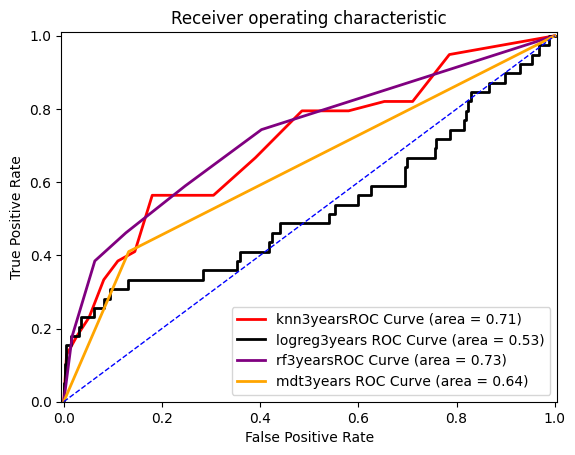

In [571]:
fpr3yearsknn, tpr3yearsknn, thresholds3yearsknn = metrics.roc_curve(y_test, y_predict_prob_knn3years[:,1], pos_label='yes')

print(fpr3yearsknn)
print(tpr3yearsknn)
AUC3yearsknn = metrics.auc(fpr3yearsknn, tpr3yearsknn)
print(AUC3yearsknn)

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr3yearsknn, tpr3yearsknn, color='red', lw=2,label='knn3yearsROC Curve (area = %0.2f)' % AUC3yearsknn)
plt.plot(fprlogreg3years, tprlogreg3years, color='black', lw=2,label='logreg3years ROC Curve (area = %0.2f)' % AUClogreg3years)
plt.plot(fprrf3years, tprrf3years, color='purple', lw=2,label='rf3yearsROC Curve (area = %0.2f)' % AUCrf3years)
plt.plot(fprmdt3years, tprmdt3years, color='orange', lw=2, label='mdt3years ROC Curve (area = %0.2f)' % AUCmdt3years)
# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')



# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

Yes count: 68
No count: 1735


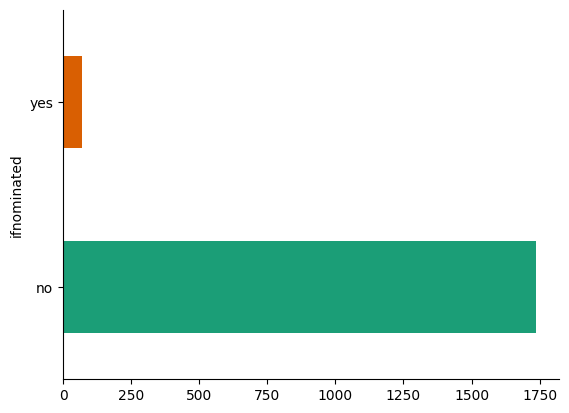

In [572]:

result3years.groupby('ifnominated').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
yes_count = result3years['ifnominated'].value_counts()['yes']
no_count = result3years['ifnominated'].value_counts()['no']
print('Yes count:', yes_count)
print('No count:', no_count)

In [573]:
# if you want right values change != into ==
wrong_values = np.where(y_predict_logreg3years != y_test)[0]
count=0
for index in wrong_values:
 print(f"Index: {index}, Predicted label: {y_predict_logreg3years[index]}, Actual label: {y_test[index]}")
 count=count+1
print(count)

Index: 12, Predicted label: yes, Actual label: no
Index: 17, Predicted label: yes, Actual label: no
Index: 24, Predicted label: yes, Actual label: no
Index: 27, Predicted label: yes, Actual label: no
Index: 38, Predicted label: yes, Actual label: no
Index: 45, Predicted label: yes, Actual label: no
Index: 48, Predicted label: yes, Actual label: no
Index: 60, Predicted label: yes, Actual label: no
Index: 83, Predicted label: no, Actual label: yes
Index: 86, Predicted label: yes, Actual label: no
Index: 93, Predicted label: yes, Actual label: no
Index: 112, Predicted label: yes, Actual label: no
Index: 113, Predicted label: yes, Actual label: no
Index: 115, Predicted label: yes, Actual label: no
Index: 116, Predicted label: yes, Actual label: no
Index: 153, Predicted label: yes, Actual label: no
Index: 167, Predicted label: yes, Actual label: no
Index: 171, Predicted label: no, Actual label: yes
Index: 173, Predicted label: yes, Actual label: no
Index: 184, Predicted label: yes, Actual l

In [574]:
wrong_values = np.where(y_predict_knn3years != y_test)[0]
count=0
for index in wrong_values:

 print(f"Index: {index}, Predicted label: {y_predict_knn3years[index]}, Actual label: {y_test[index]}")
 count=count+1
print(count)

Index: 17, Predicted label: yes, Actual label: no
Index: 25, Predicted label: yes, Actual label: no
Index: 33, Predicted label: yes, Actual label: no
Index: 38, Predicted label: yes, Actual label: no
Index: 41, Predicted label: yes, Actual label: no
Index: 48, Predicted label: yes, Actual label: no
Index: 51, Predicted label: yes, Actual label: no
Index: 54, Predicted label: yes, Actual label: no
Index: 57, Predicted label: yes, Actual label: no
Index: 58, Predicted label: yes, Actual label: no
Index: 60, Predicted label: yes, Actual label: no
Index: 63, Predicted label: yes, Actual label: no
Index: 73, Predicted label: yes, Actual label: no
Index: 74, Predicted label: yes, Actual label: no
Index: 86, Predicted label: yes, Actual label: no
Index: 87, Predicted label: yes, Actual label: no
Index: 93, Predicted label: yes, Actual label: no
Index: 94, Predicted label: yes, Actual label: no
Index: 104, Predicted label: yes, Actual label: no
Index: 110, Predicted label: yes, Actual label: n

In [575]:
wrong_values = np.where(y_predict_mdt3years != y_test)[0]
count=0
for index in wrong_values:
 print(f"Index: {index}, Predicted label: {y_predict_mdt3years[index]}, Actual label: {y_test[index]}")
 count=count+1
print(count)

Index: 0, Predicted label: yes, Actual label: no
Index: 18, Predicted label: yes, Actual label: no
Index: 25, Predicted label: yes, Actual label: no
Index: 28, Predicted label: yes, Actual label: no
Index: 34, Predicted label: yes, Actual label: no
Index: 35, Predicted label: yes, Actual label: no
Index: 48, Predicted label: yes, Actual label: no
Index: 50, Predicted label: yes, Actual label: no
Index: 57, Predicted label: yes, Actual label: no
Index: 59, Predicted label: yes, Actual label: no
Index: 67, Predicted label: yes, Actual label: no
Index: 73, Predicted label: yes, Actual label: no
Index: 81, Predicted label: yes, Actual label: no
Index: 83, Predicted label: no, Actual label: yes
Index: 87, Predicted label: yes, Actual label: no
Index: 88, Predicted label: yes, Actual label: no
Index: 98, Predicted label: yes, Actual label: no
Index: 99, Predicted label: yes, Actual label: no
Index: 116, Predicted label: yes, Actual label: no
Index: 118, Predicted label: yes, Actual label: no

In [576]:
wrong_values = np.where(y_predict_rf3years != y_test)[0]
count=0
for index in wrong_values:
 print(f"Index: {index}, Predicted label: {y_predict_rf3years[index]}, Actual label: {y_test[index]}")
 count=count+1
print(count)

Index: 0, Predicted label: yes, Actual label: no
Index: 6, Predicted label: yes, Actual label: no
Index: 13, Predicted label: yes, Actual label: no
Index: 25, Predicted label: yes, Actual label: no
Index: 34, Predicted label: yes, Actual label: no
Index: 38, Predicted label: yes, Actual label: no
Index: 45, Predicted label: yes, Actual label: no
Index: 46, Predicted label: yes, Actual label: no
Index: 48, Predicted label: yes, Actual label: no
Index: 50, Predicted label: yes, Actual label: no
Index: 60, Predicted label: yes, Actual label: no
Index: 73, Predicted label: yes, Actual label: no
Index: 81, Predicted label: yes, Actual label: no
Index: 83, Predicted label: no, Actual label: yes
Index: 85, Predicted label: yes, Actual label: no
Index: 86, Predicted label: yes, Actual label: no
Index: 87, Predicted label: yes, Actual label: no
Index: 95, Predicted label: yes, Actual label: no
Index: 104, Predicted label: yes, Actual label: no
Index: 112, Predicted label: yes, Actual label: no
